In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data file downloaded 02-27-18
# This will be the file used, data is from 11/1/15 to 2/20/18

# Assign filename
data_022718 = 'crime-datacrime-datacrimestat.csv'

# Read file in DataFrame
crime = pd.read_csv(data_022718, sep=',', low_memory=False)

# Quick view of the data
print(crime.head())
print(crime.info())

# Rename columns
crime.columns = ['incident#', 'date_occurred_on', 'date_occurred_to', 'crime_cat', '100_block_addr', 'zip', 'premise_type']


        INC NUMBER        OCCURRED ON        OCCURRED TO   UCR CRIME CATEGORY  \
0  201600000052855  11/01/2015  00:00  01/09/2016  00:00  MOTOR VEHICLE THEFT   
1  201600000594484  11/01/2015  00:00                NaN                 RAPE   
2  201500002102327  11/01/2015  00:00  11/01/2015  09:00        LARCENY-THEFT   
3  201500002101405  11/01/2015  00:00  11/01/2015  05:00  MOTOR VEHICLE THEFT   
4  201500002102668  11/01/2015  00:00  11/01/2015  11:50  MOTOR VEHICLE THEFT   

             100 BLOCK ADDR      ZIP         PREMISE TYPE  
0  N 43RD AVE & W CACTUS RD  85029.0  SINGLE FAMILY HOUSE  
1         13XX E ALMERIA RD  85006.0  SINGLE FAMILY HOUSE  
2            51XX N 15TH ST  85014.0            APARTMENT  
3       102XX W MEDLOCK AVE  85307.0  SINGLE FAMILY HOUSE  
4            69XX W WOOD ST  85043.0  SINGLE FAMILY HOUSE  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148468 entries, 0 to 148467
Data columns (total 7 columns):
INC NUMBER            148468 non-null objec

In [2]:
# 4 variables have missing data: Occurred On, Occurred To, Zip, Premise Type
print(crime[['date_occurred_on', 'date_occurred_to', 'zip', 'premise_type']].isna().sum())
# 'date_occurred_to' field is blank because the victim knows the exact time the incident occurred and only the 'date_occurred_on' is populated

# Sum number of incidents where occurred_on and occurred_to are NaN
print(crime[(crime.date_occurred_on.isna()) & (crime.date_occurred_to.isna())])

# 
print(crime.loc[crime['zip'].isna()])
print(crime.loc[crime['date_occurred_on'].isna()].head())
print(crime.loc[crime['date_occurred_to'].isna()].head())
print(crime.loc[crime['premise_type'].isna()].head())

date_occurred_on      336
date_occurred_to    43719
zip                     3
premise_type          805
dtype: int64
Empty DataFrame
Columns: [incident#, date_occurred_on, date_occurred_to, crime_cat, 100_block_addr, zip, premise_type]
Index: []
             incident#   date_occurred_on   date_occurred_to      crime_cat  \
63037  201700001136425  11/04/2016  00:00  06/25/2017  00:00           RAPE   
79708  201700000206086  02/04/2017  10:00  02/04/2017  10:14  LARCENY-THEFT   
82276  201700000368400  02/18/2017  12:00  02/27/2017  15:23  LARCENY-THEFT   

             100_block_addr  zip             premise_type  
63037       451XX W RHEA RD  NaN                APARTMENT  
79708     XX W BASELINE AVE  NaN          SPECIALTY STORE  
82276  122XX N TABLE TOP RD  NaN  FENCED RESIDENTIAL YARD  
            incident# date_occurred_on   date_occurred_to      crime_cat  \
248   201500002110561              NaN  11/02/2015  14:40        ROBBERY   
275   201500002132194              NaN  11/02

In [3]:
# Identify the unique values
print(crime[['crime_cat', 'zip', 'premise_type']].nunique())
print(crime.crime_cat.unique())
print(crime.zip.unique())
print(crime.premise_type.unique())

crime_cat        9
zip             99
premise_type    94
dtype: int64
['MOTOR VEHICLE THEFT' 'RAPE' 'LARCENY-THEFT' 'DRUG OFFENSE' 'BURGLARY'
 'AGGRAVATED ASSAULT' 'MURDER AND NON-NEGLIGENT MANSLAUGHTER' 'ROBBERY'
 'ARSON']
[85029. 85006. 85014. 85307. 85043. 85017. 85085. 85019. 85031. 85027.
 85024. 85339. 85028. 85018. 85015. 85008. 85254. 85051. 85023. 85009.
 85044. 85035. 85041. 85003. 85048. 85353. 85016. 85022. 85033. 85040.
 85007. 85050. 85004. 85054. 85032. 85013. 85034. 85042. 85021. 85012.
 85053. 85308. 85086. 85020. 85037. 85331. 85306. 85083. 85310. 85045.
 85087. 85301. 85253. 85304. 85255. 85251. 85258. 85225. 85363. 85282.
 85268. 85213. 85395. 85202. 85201. 85381. 85281. 85210. 85323. 85224.
 85345. 85302. 85266. 85382. 85392. 85303. 85260. 85286. 85296. 85203.
 85248. 85295. 85290. 85326. 85234. 85283. 85215. 85226. 85257. 85305.
    nan 85383. 85204. 85337. 85396. 85338. 85335. 85233. 85212. 85355.]
['SINGLE FAMILY HOUSE' 'APARTMENT' 'PARKING LOT' 'HOSPITAL' 'VEHI

In [4]:
# Cleaning the data set

# Remove missing zip code rows and convert to str
crime_clean = crime.drop(crime.index[[63037, 79708, 82276]])
print(crime_clean.loc[crime_clean['zip'].isna()])

# Fill in missing date values with date_occurred_on or date_occurred_to
crime_clean.date_occurred_on.fillna(crime_clean.date_occurred_to, inplace=True)
print(crime_clean.iloc[248])
crime_clean.date_occurred_to.fillna(crime_clean.date_occurred_on, inplace=True)
print(crime_clean.iloc[24])
print(crime_clean[['date_occurred_on', 'date_occurred_to']].isna().sum())

# Premise type NaN convert to Unknown
crime_clean.premise_type = crime_clean.premise_type.fillna('UNKNOWN')
crime_clean.info()

# Clean dataframe is called crime_clean

Empty DataFrame
Columns: [incident#, date_occurred_on, date_occurred_to, crime_cat, 100_block_addr, zip, premise_type]
Index: []
incident#                               201500002110561
date_occurred_on                      11/02/2015  14:40
date_occurred_to                      11/02/2015  14:40
crime_cat                                       ROBBERY
100_block_addr                       41XX W BASELINE RD
zip                                               85041
premise_type        STREET / ROADWAY / ALLEY / SIDEWALK
Name: 248, dtype: object
incident#                      201500002100158
date_occurred_on             11/01/2015  00:05
date_occurred_to             11/01/2015  00:05
crime_cat                  MOTOR VEHICLE THEFT
100_block_addr             28XX W CAMELBACK RD
zip                                      85017
premise_type        CONVENIENCE MARKET / STORE
Name: 24, dtype: object
date_occurred_on    0
date_occurred_to    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64I

count            148465
unique                9
top       LARCENY-THEFT
freq              74883
Name: crime_cat, dtype: object

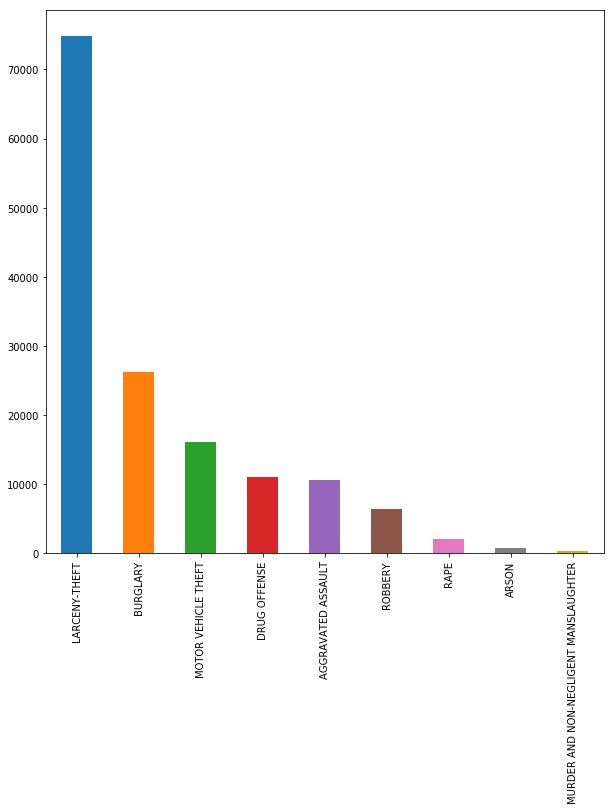

In [12]:
# Exploratory Data Analysis

crime_clean['crime_cat'].value_counts().plot(kind='bar', figsize=(10,10))
crime_clean.crime_cat.describe()

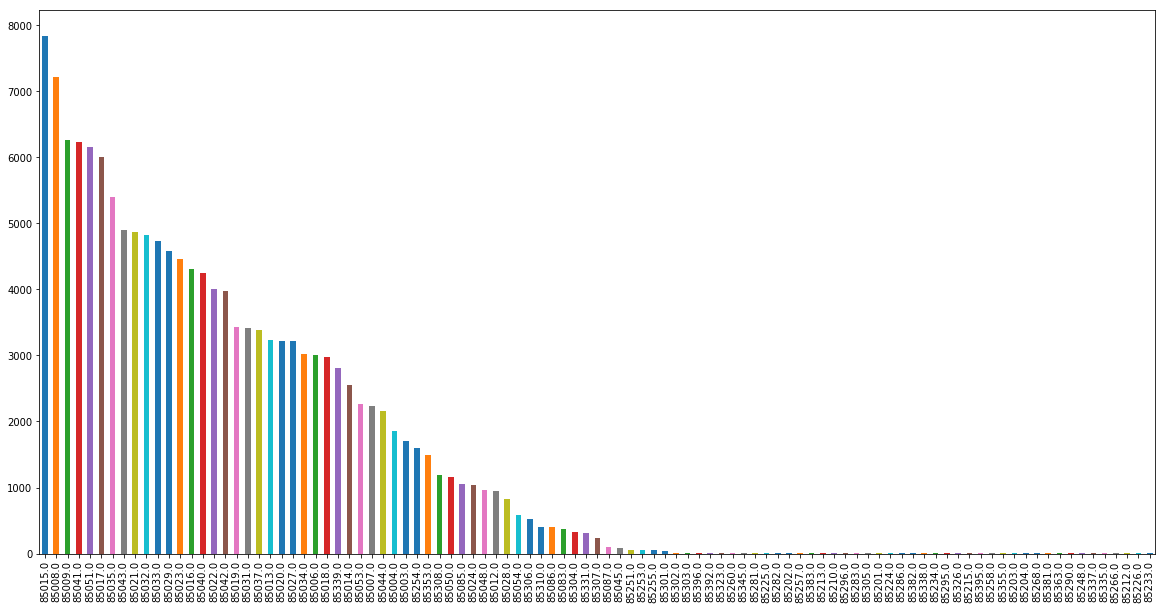

In [43]:
crime_clean['zip'].value_counts().plot(kind='bar', figsize=(20,10))

count                  148465
unique                     94
top       SINGLE FAMILY HOUSE
freq                    28011
Name: premise_type, dtype: object

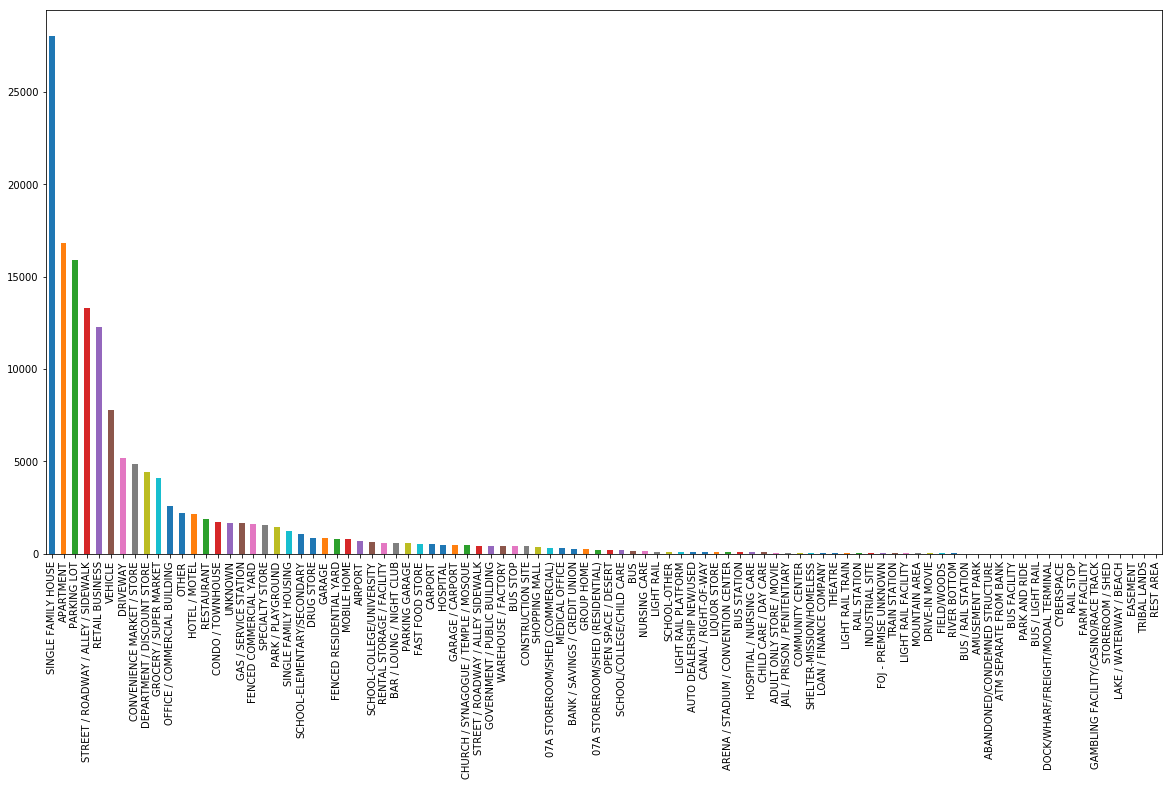

In [14]:
crime_clean['premise_type'].value_counts().plot(kind='bar', figsize=(20,10))
crime_clean.premise_type.describe()

In [24]:
crime_clean['100_block_addr'].value_counts()#.plot(kind='bar', figsize=(20,10))
#crime_clean['100_block_addr'].describe()

18XX W BELL RD                 934
61XX N 35TH AVE                813
16XX W BETHANY HOME RD         681
57XX N 19TH AVE                665
76XX W THOMAS RD               543
37XX E THOMAS RD               527
61XX S 35TH AVE                514
20XX N 75TH AVE                472
172XX N 19TH AVE               437
45XX E CACTUS RD               435
52XX W INDIAN SCHOOL RD        433
17XX W BETHANY HOME RD         431
80XX N 19TH AVE                427
38XX E SKY HARBOR BLVD         384
45XX E THOMAS RD               351
7XX W CAMELBACK RD             337
70XX W INDIAN SCHOOL RD        331
25XX W HAPPY VALLEY RD         306
168XX N 7TH ST                 303
210XX N TATUM BLVD             269
34XX W DUNLAP AVE              265
3XX E MCDOWELL RD              259
18XX W GLENDALE AVE            253
47XX E RAY RD                  245
42XX W MCDOWELL RD             237
21XX E BASELINE RD             235
89XX N 19TH AVE                230
34XX E SKY HARBOR BLVD         223
48XX N 83RD AVE     

In [40]:
# Look at crime by zip
crime_clean.groupby('crime_cat')['zip'].value_counts()
#sns.stripplot(x='premise_type', y='zip', hue='crime_cat', data=crime_clean, jitter=True,)

crime_cat           zip    
AGGRAVATED ASSAULT  85008.0    592
                    85009.0    559
                    85017.0    544
                    85015.0    539
                    85041.0    483
                    85051.0    456
                    85035.0    422
                    85033.0    407
                    85040.0    392
                    85021.0    391
                    85043.0    390
                    85029.0    312
                    85032.0    302
                    85019.0    282
                    85006.0    281
                    85031.0    281
                    85007.0    276
                    85037.0    261
                    85022.0    255
                    85020.0    245
                    85042.0    235
                    85034.0    227
                    85023.0    216
                    85016.0    202
                    85339.0    189
                    85018.0    183
                    85013.0    181
                    85027.0

In [44]:
# Look at crime by zip and address
crime_clean.groupby(['zip', '100_block_addr','premise_type'])['crime_cat'].value_counts()

zip      100_block_addr                 premise_type                         crime_cat          
85003.0  10XX N 1ST AVE                 BUS STOP                             LARCENY-THEFT          1
                                        LIGHT RAIL TRAIN                     ROBBERY                1
                                        RESTAURANT                           BURGLARY               1
                                                                             LARCENY-THEFT          1
         10XX N 1ST DR                  APARTMENT                            RAPE                   1
                                        PARKING LOT                          LARCENY-THEFT          1
         10XX N 2ND AVE                 APARTMENT                            LARCENY-THEFT          2
                                                                             AGGRAVATED ASSAULT     1
                                                                             MOTOR VEHI